Actividad de Diego Vargas y Francisco Aguilera

# P3:

In [1]:
def FIR(f, M=1):
    # f es una colección de puntos que representa a la función
    g = np.zeros(len(f))
    
    for n in range(len(g)):
        for k in range (0, M):
            g[n] += (1/M) * f[n-k]
    return g

In [2]:
def IIR(f, M=1):
    g = np.zeros(len(f))
    
    for n in range(len(g)):
        
        if n-M <0:
            f_anterior = 0
        else:
            f_anterior = f[n-M]
        
        g[n] = g[n-1] + (1/M) * (f[n] - f_anterior) 
        
    return g

# P4:

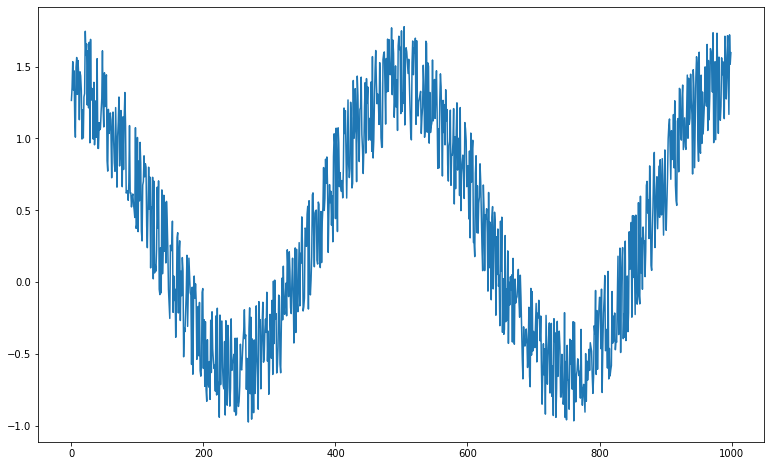

In [3]:
import matplotlib.pyplot as plt
import numpy as np

ruido = np.random.random(1000)*0.8
x = np.linspace(0, 4*np.pi, 1000) 
cos = np.array(np.cos(x))

cos_ruido = cos + ruido
  
plt.figure(figsize=(13, 8))
display(plt.plot(cos_ruido))


# P5:

En vez de elegir un valor de M, hagamos una animación que cambie el valor de M y veamos como cambia el filtro!
Vamos a apreciar que en la medida que M aumenta la salida va teniendo menos ruido. Además, como el filtro IIR tiene el término $f[n-M]$, la salida no va a hacer nada hasta que tengamos suficientes muestras de M para considerar un valor anterior. Esto úlltimo se aprecia en el comportamiento no sinusoidal del coseno 

<IPython.core.display.Javascript object>


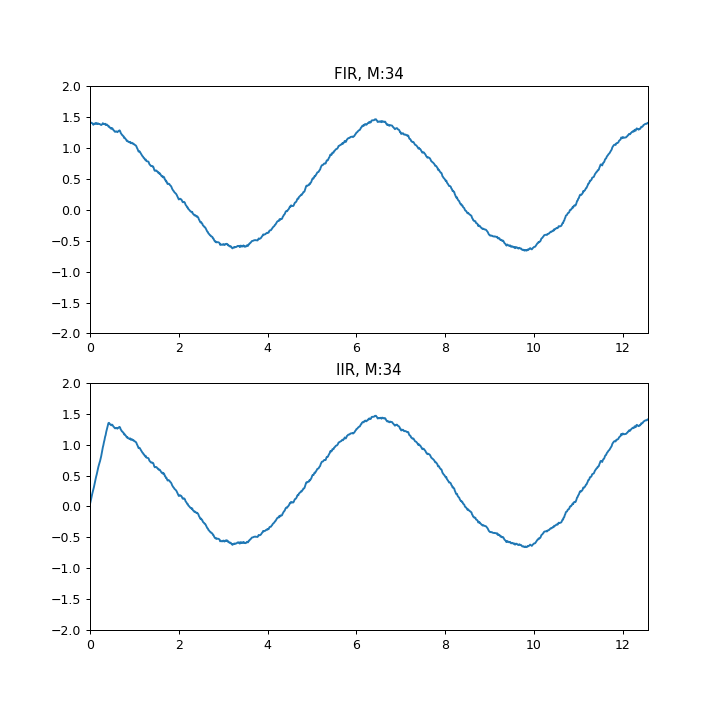

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook
from matplotlib.animation import FuncAnimation

x = np.linspace(0, 4*np.pi, 1000) 
fig, ax = plt.subplots(2, figsize = (8,8))

line1, = ax[0].plot([])
ax[0].set_xlim(0, 4*np.pi)
ax[0].set_ylim(-2,2)

line2, = ax[1].plot([])
ax[1].set_xlim(0, 4*np.pi)
ax[1].set_ylim(-2,2)

def animate_1(M):     
    cos_fir = FIR(cos_ruido, M)    

    line1.set_data((x, cos_fir))
    ax[0].set_title(f"FIR, M:{M}")
    return line1

def animate_2(M):
    cos_iir = IIR(cos_ruido, M)    

    line2.set_data((x, cos_iir))
    ax[1].set_title(f"IIR, M:{M}")
    return line2

anim1 = FuncAnimation(fig, animate_1, frames=np.arange(1, 1000, 1), interval=100, repeat = False)
anim2 = FuncAnimation(fig, animate_2, frames=np.arange(1, 1000, 1), interval=100, repeat = False)

plt.show()

Si se quiere probar a mano:

<IPython.core.display.Javascript object>


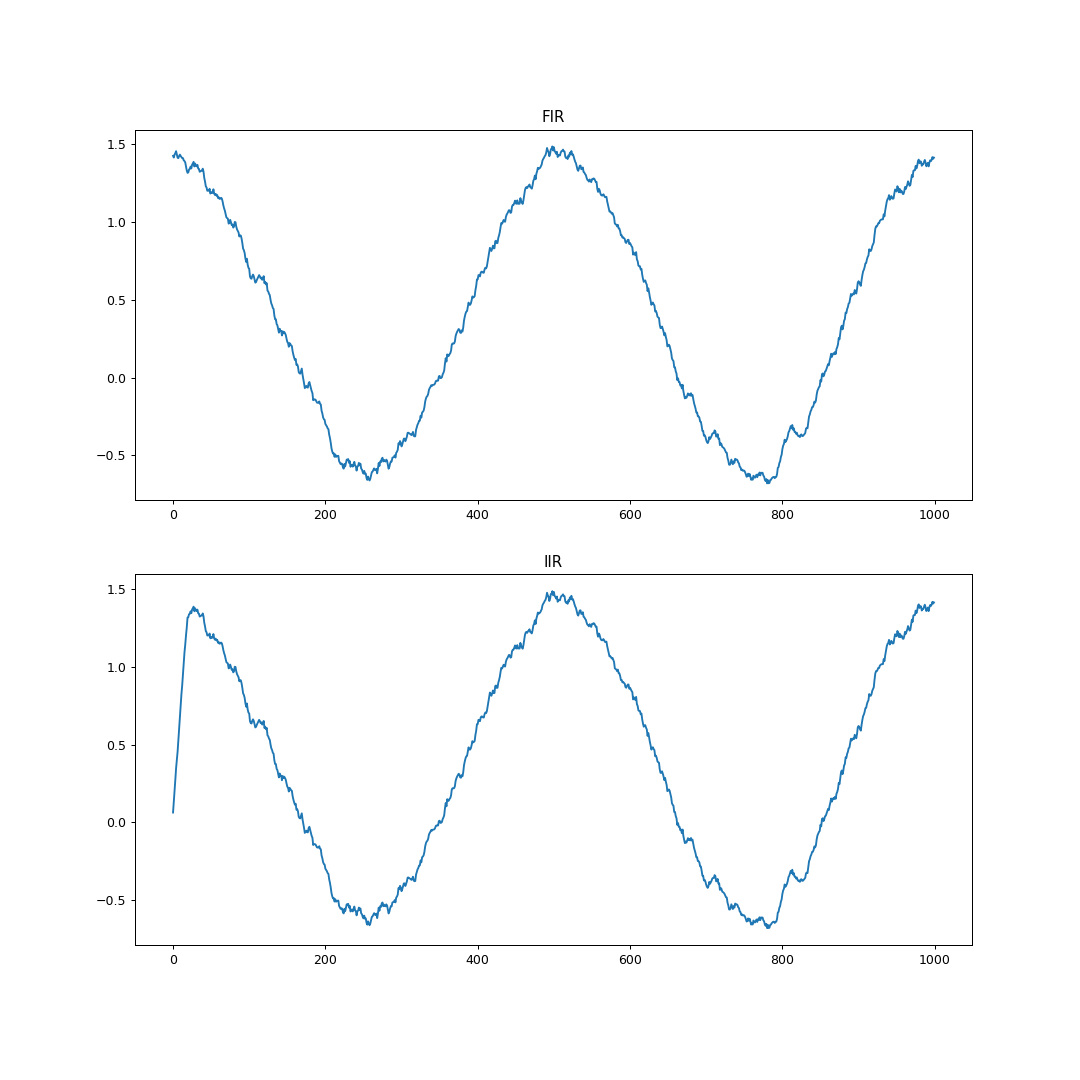

Text(0.5, 1.0, 'IIR')

In [5]:
M = 20
cos_fir = FIR(cos_ruido, M)
cos_iir = IIR(cos_ruido, M)
fig, axs = plt.subplots(2, figsize = (12,12))

axs[0].plot(cos_fir)
axs[1].plot(cos_iir)

axs[0].set_title("FIR")
axs[1].set_title("IIR")